In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

import pandas


In [ ]:
url = "https://raw.githubusercontent.com/hsandmann/espm.ml/master/mlp/vix_2011_2019.csv"
df = pandas.read_csv(url)


In [ ]:
df.head()


In [ ]:
df = df.reindex(columns=['Date', 'Adj Close'])


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 2 columns):
Date         2054 non-null object
Adj Close    2054 non-null float64
dtypes: float64(1), object(1)
memory usage: 32.2+ KB


In [0]:
df['Date'] = pandas.to_datetime(df['Date'])


In [0]:
df = df.set_index(['Date'], drop=True)


In [56]:
df.head(10)


,Adj Close
Date,
2011-02-11,15.690000
2011-02-14,15.950000
2011-02-15,16.370001
2011-02-16,16.719999
2011-02-17,16.590000
2011-02-18,16.430000
2011-02-22,20.799999
2011-02-23,22.129999
2011-02-24,21.320000


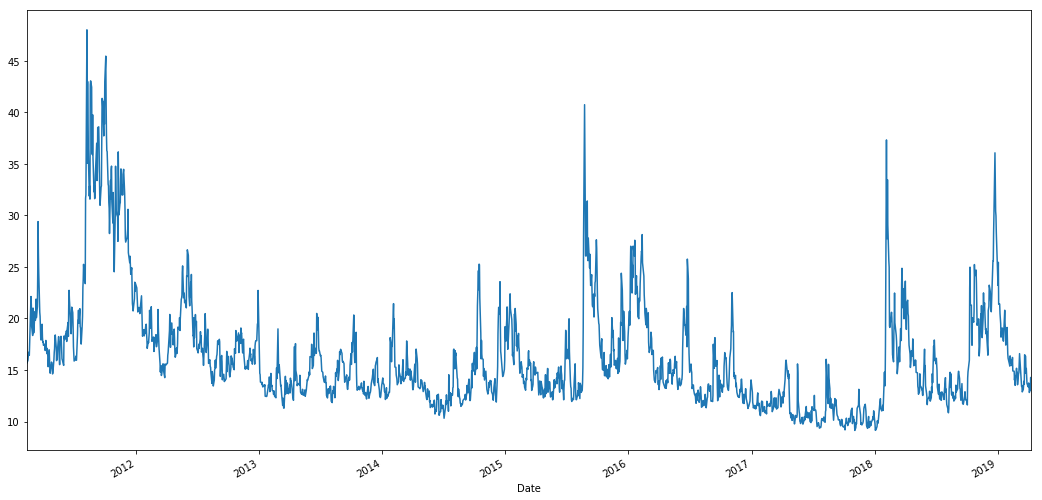

In [57]:
pyplot.figure(figsize=(18, 9))
df['Adj Close'].plot();


In [0]:
split_date = pandas.Timestamp('2018-01-01')


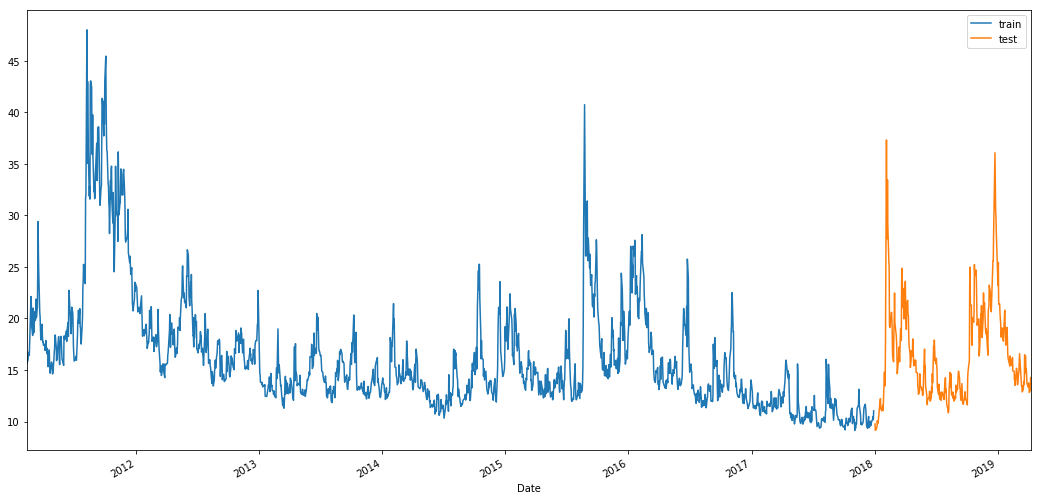

In [59]:
df =  df['Adj Close']
train = df.loc[:split_date]
test = df.loc[split_date:]
pyplot.figure(figsize=(18, 9))
ax = train.plot()
test.plot(ax=ax)
pyplot.legend(['train', 'test']);


### Data Normalization


In [0]:
train_min = min(train)
train_max = max(train)
train_sc = (train - train_min) / (train_max - train_min) * 2 - 1

test_min = min(test)
test_max = max(test)
test_sc = (test - test_min) / (test_max - test_min) * 2 - 1


In [0]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]


### Sigmoidal training - SGD Optimizer


In [62]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='sigmoid'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='sgd')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/100
1732/1732 [==============================] - 2s 890us/step - loss: 0.0275
Epoch 2/100
1732/1732 [==============================] - 1s 752us/step - loss: 0.0148
Epoch 3/100
1732/1732 [==============================] - 1s 743us/step - loss: 0.0135
Epoch 4/100
1732/1732 [==============================] - 1s 741us/step - loss: 0.0122
Epoch 5/100
1732/1732 [==============================] - 1s 741us/step - loss: 0.0111
Epoch 6/100
1732/1732 [==============================] - 1s 737us/step - loss: 0.0101
Epoch 7/100
1732/1732 [==============================] - 1s 737us/step - loss: 0.0093
Epoch 8/100
1732/1732 [==============================] - 1s 741us/step - loss: 0.0086
Epoch 9/100
1732/1732 [==============================] - 1s 737us/step - loss: 0.0080
Epoch 10/100
1732/1732 [==============================] - 1s 748us/step - loss: 0.0075
Epoch 11/100
1732/1732 [==============================] - 1s 755us/step - loss: 0.0072
Epoch 12/100
1732/1732 [============================

### Training process


In [0]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)


### Results


In [64]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('Error: %f'%nn_test_mse)


The R2 score on the Train set is:	0.803
The R2 score on the Test set is:	0.668
320/320 [==============================] - 0s 613us/step
Error: 0.036361


In [0]:
history_sigmoid = history.history['loss']


### Relu training - SGD Optimizer


In [66]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='sgd')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/100
1732/1732 [==============================] - 2s 888us/step - loss: 0.0175
Epoch 2/100
1732/1732 [==============================] - 1s 753us/step - loss: 0.0064
Epoch 3/100
1732/1732 [==============================] - 1s 752us/step - loss: 0.0060
Epoch 4/100
1732/1732 [==============================] - 1s 757us/step - loss: 0.0059
Epoch 5/100
1732/1732 [==============================] - 1s 747us/step - loss: 0.0059
Epoch 6/100
1732/1732 [==============================] - 1s 746us/step - loss: 0.0059
Epoch 7/100
1732/1732 [==============================] - 1s 740us/step - loss: 0.0059
Epoch 8/100
1732/1732 [==============================] - 1s 748us/step - loss: 0.0059
Epoch 9/100
1732/1732 [==============================] - 1s 750us/step - loss: 0.0059
Epoch 10/100
1732/1732 [==============================] - 1s 753us/step - loss: 0.0059
Epoch 11/100
1732/1732 [==============================] - 1s 753us/step - loss: 0.0059
Epoch 12/100
1732/1732 [============================

In [0]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)


In [68]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('Error: %f'%nn_test_mse)


The R2 score on the Train set is:	0.861
The R2 score on the Test set is:	0.750
320/320 [==============================] - 0s 809us/step
Error: 0.027410


In [0]:
history_relu = history.history['loss']


### Sigmoidal training - Adam Optimizer


In [70]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='sigmoid'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1732/1732 [==============================] - 2s 1ms/step - loss: 0.0249
Epoch 2/100
1732/1732 [==============================] - 2s 1ms/step - loss: 0.0107
Epoch 3/100
1732/1732 [==============================] - 1s 852us/step - loss: 0.0074
Epoch 4/100
1732/1732 [==============================] - 1s 838us/step - loss: 0.0066
Epoch 5/100
1732/1732 [==============================] - 1s 831us/step - loss: 0.0065
Epoch 6/100
1732/1732 [==============================] - 1s 829us/step - loss: 0.0064
Epoch 7/100
1732/1732 [==============================] - 1s 850us/step - loss: 0.0064
Epoch 8/100
1732/1732 [==============================] - 1s 816us/step - loss: 0.0064
Epoch 9/100
1732/1732 [==============================] - 1s 827us/step - loss: 0.0064
Epoch 10/100
1732/1732 [==============================] - 1s 825us/step - loss: 0.0064
Epoch 11/100
1732/1732 [==============================] - 1s 832us/step - loss: 0.0064
Epoch 12/100
1732/1732 [==============================] 

In [0]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)


In [72]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('Error: %f'%nn_test_mse)


The R2 score on the Train set is:	0.860
The R2 score on the Test set is:	0.748
320/320 [==============================] - 0s 709us/step
Error: 0.027594


In [0]:
history_sigmoid_adam = history.history['loss']


### Relu training - Adam Optimizer


In [74]:
nn_model = Sequential()
nn_model.add(Dense(12, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)


Epoch 1/100
1732/1732 [==============================] - 2s 1ms/step - loss: 0.0551
Epoch 2/100
1732/1732 [==============================] - 1s 839us/step - loss: 0.0067
Epoch 3/100
1732/1732 [==============================] - 1s 858us/step - loss: 0.0063
Epoch 4/100
1732/1732 [==============================] - 1s 842us/step - loss: 0.0062
Epoch 5/100
1732/1732 [==============================] - 1s 836us/step - loss: 0.0061
Epoch 6/100
1732/1732 [==============================] - 1s 848us/step - loss: 0.0062
Epoch 7/100
1732/1732 [==============================] - 1s 836us/step - loss: 0.0062
Epoch 00007: early stopping


In [0]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)


In [76]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('Error: %f'%nn_test_mse)


The R2 score on the Train set is:	0.871
The R2 score on the Test set is:	0.763
320/320 [==============================] - 0s 790us/step
Error: 0.025943


In [0]:
history_relu_adam = history.history['loss']


Text(0, 0.5, 'Mean Error')

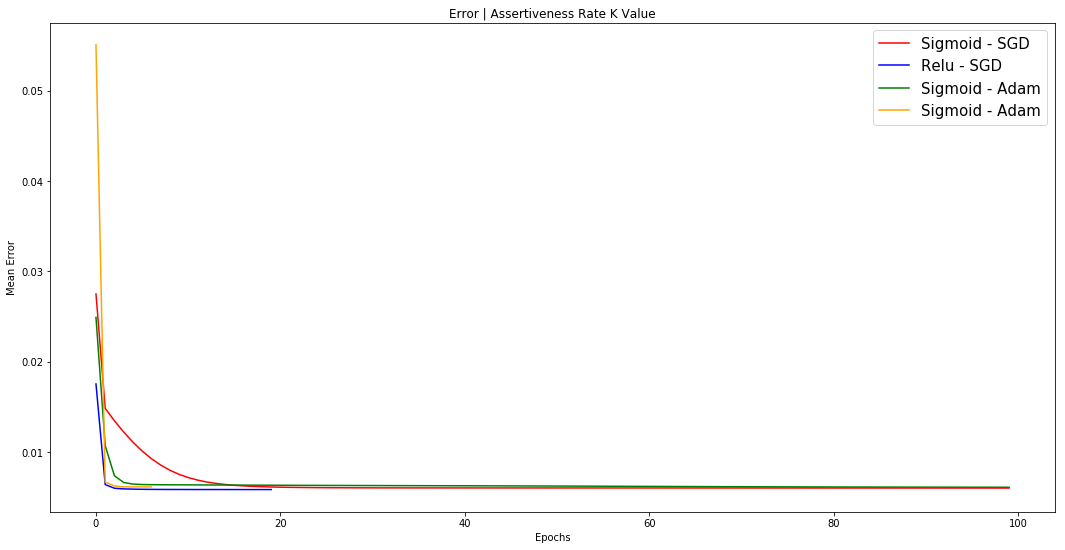

In [82]:
pyplot.figure(figsize=(18, 9))  
pyplot.plot(range(0, len(history_sigmoid)), history_sigmoid, color='red', linestyle='-', marker=' ', markerfacecolor='blue', markersize=10)
pyplot.plot(range(0, len(history_relu)), history_relu, color='blue', linestyle='-', marker=' ',  markerfacecolor='blue', markersize=10)
pyplot.plot(range(0, len(history_sigmoid_adam)), history_sigmoid_adam, color='green', linestyle='-', marker=' ', markerfacecolor='blue', markersize=10)
pyplot.plot(range(0, len(history_relu_adam)), history_relu_adam, color='orange', linestyle='-', marker=' ', markerfacecolor='blue', markersize=10)
pyplot.legend(['Sigmoid - SGD', 'Relu - SGD', 'Sigmoid - Adam', 'Sigmoid - Adam'], loc='upper right', prop={'size': 15})
pyplot.title('Error | Assertiveness Rate K Value')  
pyplot.xlabel('Epochs')  
pyplot.ylabel('Mean Error')  
